In [12]:
# ---------------------------------------------------------------------------------
# Theoretical Explanation: Color Smoothing Using a 3x3 Averaging Kernel
# ---------------------------------------------------------------------------------
# Color smoothing is a technique used to reduce noise and smooth out color transitions
# in an image. It works by applying a filter (kernel) over the image and averaging
# the values of pixel neighborhoods for each color channel (Red, Green, Blue).
#
# Steps:
# 1. **Kernel Definition**:
#    A 3x3 averaging kernel is defined as:
#       [[1/9, 1/9, 1/9],
#        [1/9, 1/9, 1/9],
#        [1/9, 1/9, 1/9]]
#    The kernel values sum to 1 to ensure the result remains within the original range.
#
# 2. **Neighborhood Processing**:
#    For each pixel in the image, a 3x3 neighborhood (centered around the pixel)
#    is extracted. The kernel is applied by performing an element-wise multiplication
#    (dot product) between the neighborhood and the kernel, followed by summation.
#
# 3. **Zero Padding**:
#    To handle edge pixels (where a 3x3 neighborhood cannot be formed completely),
#    explicit zero-padding is applied to the image. This involves adding a border
#    of zeros around the image to ensure every pixel has a complete 3x3 neighborhood.
#    Both manual implementation and OpenCV's `filter2D` function use this padding.
#
# 4. **Channel-wise Smoothing**:
#    The process is repeated for each of the three color channels (Red, Green, Blue).
#    After processing, the smoothed channels are combined back into a single image.
#
# 5. **Output**:
#    The output is a smoothed image where abrupt changes in color or intensity are 
#    minimized. This technique is particularly useful for reducing noise and preparing 
#    images for further processing (e.g., edge detection, segmentation).
#
# Key Considerations:
# - Explicit zero-padding ensures consistency when comparing manual and automated methods.
# - Smoothing reduces noise but may blur fine details.
# - Larger kernels (e.g., 5x5, 7x7) result in more aggressive smoothing but may lead to
#   excessive blurring.
#
# Mathematical Representation:
# For a pixel at position (i, j) in a channel C:
#    Smoothed_C(i, j) = Σ (kernel[x, y] * padded_C(i+x-1, j+y-1))
# where x, y ∈ {0, 1, 2} and padded_C represents the zero-padded image channel.
#
# Example:
# Input Red Channel (3x3):
#   255,   0,   0
#   255,   0, 255
#   128,  64,  32
#
# Zero-Padded Red Channel (5x5):
#     0,   0,   0,   0,   0
#     0, 255,   0,   0,   0
#     0, 255,   0, 255,   0
#     0, 128,  64,  32,   0
#     0,   0,   0,   0,   0
#
# Kernel:
#   1/9 * [[1, 1, 1],
#          [1, 1, 1],
#          [1, 1, 1]]
#
# Output Smoothed Red Channel (3x3):
#    56,  85,  28
#    78, 109,  39
#    49,  81,  39
#
# Practical Implementation:
# - OpenCV's `filter2D` can efficiently apply the kernel to the zero-padded image.
# - For educational purposes, a manual implementation using matrix dot products is
#   demonstrated and compared to the automated method for consistency.
# ---------------------------------------------------------------------------------


Original Red Channel:
[[255   0   0]
 [255   0 255]
 [128  64  32]]

Smoothed Red Channel (OpenCV with Zero-Padding):
[[ 56  85  28]
 [ 78 109  39]
 [ 49  81  39]]

Smoothed Red Channel (Manual Dot Product):
[[ 56  85  28]
 [ 78 109  39]
 [ 49  81  39]]

Do the results match? True


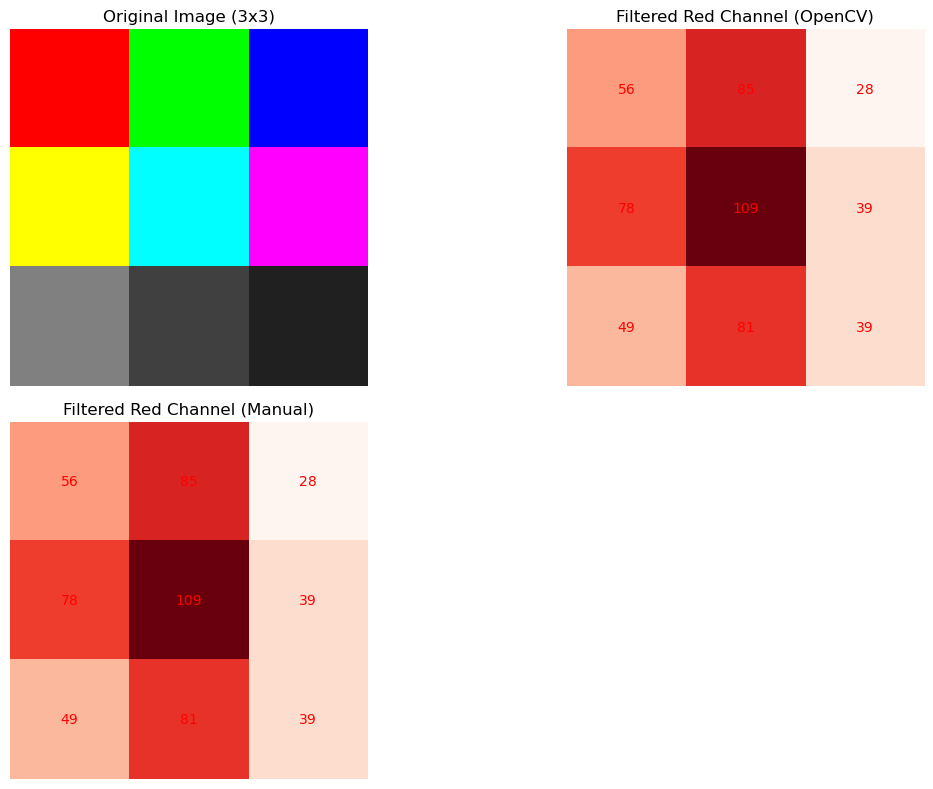

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------------
# Input Image Explanation
# The image is represented as a 3D array (3x3x3) with pixel values for each channel:
#
# Red Channel (R):
# 255,   0,   0
# 255,   0, 255
# 128,  64,  32
#
# The goal is to apply 3x3 neighborhood averaging (smoothing) to the red channel:
# 1. Zero Padding: Surround the original image with zeros to handle edge pixels.
# 2. Apply a 3x3 averaging kernel to each channel individually.
# ---------------------------------------------------------------------------------

# Original Image
image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],  # Row 1: Red, Green, Blue
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],  # Row 2: Yellow, Cyan, Magenta
    [[128, 128, 128], [64, 64, 64], [32, 32, 32]]   # Row 3: Shades of gray
], dtype=np.uint8)

# Define the 3x3 averaging kernel
kernel = np.ones((3, 3), dtype=np.float32) / 9

# Separate the red channel
red_channel = image[:, :, 0]

# ---------------------------------------------------------------------------------
# Approach 1: Smoothing using OpenCV's filter2D with explicit zero-padding
# ---------------------------------------------------------------------------------
# Convert the red channel to float32 for compatibility with OpenCV
red_channel_float = red_channel.astype(np.float32)

# Apply explicit zero-padding to the input before using OpenCV's filter2D
red_padded = cv2.copyMakeBorder(red_channel_float, 1, 1, 1, 1, borderType=cv2.BORDER_CONSTANT, value=0)

# Apply the filter
smoothed_red_cv = cv2.filter2D(src=red_padded, ddepth=-1, kernel=kernel)

# Crop the result to match the original image size
smoothed_red_cv_cropped = smoothed_red_cv[1:-1, 1:-1]

# ---------------------------------------------------------------------------------
# Approach 2: Smoothing using manual matrix dot product
# ---------------------------------------------------------------------------------
# Step 1: Zero pad the red channel manually
red_padded_manual = np.pad(red_channel, pad_width=1, mode='constant', constant_values=0)

# Step 2: Perform dot product with kernel manually
smoothed_red_manual = np.zeros_like(red_channel, dtype=np.float32)
rows, cols = red_channel.shape

# Iterate through each pixel in the original image
for i in range(rows):
    for j in range(cols):
        # Extract the 3x3 neighborhood
        neighborhood = red_padded_manual[i:i+3, j:j+3]
        # Compute the average using dot product
        smoothed_red_manual[i, j] = np.sum(neighborhood * kernel)

# ---------------------------------------------------------------------------------
# Convert Results to uint8
# ---------------------------------------------------------------------------------
smoothed_red_cv_uint8 = np.clip(smoothed_red_cv_cropped, 0, 255).astype(np.uint8)
smoothed_red_manual_uint8 = np.clip(smoothed_red_manual, 0, 255).astype(np.uint8)

# ---------------------------------------------------------------------------------
# Print Results
# ---------------------------------------------------------------------------------
print("Original Red Channel:")
print(red_channel)

print("\nSmoothed Red Channel (OpenCV with Zero-Padding):")
print(smoothed_red_cv_uint8)

print("\nSmoothed Red Channel (Manual Dot Product):")
print(smoothed_red_manual_uint8)

# ---------------------------------------------------------------------------------
# Verify Both Results Match
# ---------------------------------------------------------------------------------
print("\nDo the results match?", np.array_equal(smoothed_red_cv_uint8, smoothed_red_manual_uint8))

# ---------------------------------------------------------------------------------
# Visualizing the Results
# ---------------------------------------------------------------------------------
def display_channel_with_values(ax, channel, title, cmap):
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')

    # Overlay values in red color
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            ax.text(j, i, f'{channel[i, j]:.0f}', ha='center', va='center', color='red')

# Plot the results using Matplotlib
plt.figure(figsize=(12, 8))

# Original Image (without padding)
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image (3x3)")
plt.axis('off')

# Filtered Red Channel (OpenCV)
ax = plt.subplot(2, 2, 2)
display_channel_with_values(ax, smoothed_red_cv_uint8, "Filtered Red Channel (OpenCV)", cmap='Reds')

# Filtered Red Channel (Manual Dot Product)
ax = plt.subplot(2, 2, 3)
display_channel_with_values(ax, smoothed_red_manual_uint8, "Filtered Red Channel (Manual)", cmap='Reds')

plt.tight_layout()
plt.show()
